In [147]:
#import seaborn as sns
import pandas as pd
import numpy as np
#import seaborn.objects as s
from plotnine import *
import scipy.stats as stats

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/6b/d4/d62ce38ba00dc67d7ec4ec5cc19d36958d8ed70e63778715ad626bcbc796/scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)


In [194]:
cutoff_all = pd.read_csv("nc_strains_results1")
cutoff_vamb = pd.read_csv("nc_strains_results2")
cutoff_all

,nc_strains,vamb_run,contig_cutoff,location
0,67,1,500,Airways
1,71,2,500,Airways
2,61,3,500,Airways
3,82,4,500,Airways
4,77,5,500,Airways
...,...,...,...,...
95,50,1,2000,Urogenital
96,44,2,2000,Urogenital
97,47,3,2000,Urogenital
98,43,4,2000,Urogenital


In [130]:
cutoff_vamb

,nc_strains,vamb_run,contig_cutoff,location
0,58,1,500,Airways
1,75,2,500,Airways
2,75,3,500,Airways
3,78,4,500,Airways
4,73,5,500,Airways
...,...,...,...,...
95,52,1,2000,Urogenital
96,45,2,2000,Urogenital
97,50,3,2000,Urogenital
98,48,4,2000,Urogenital


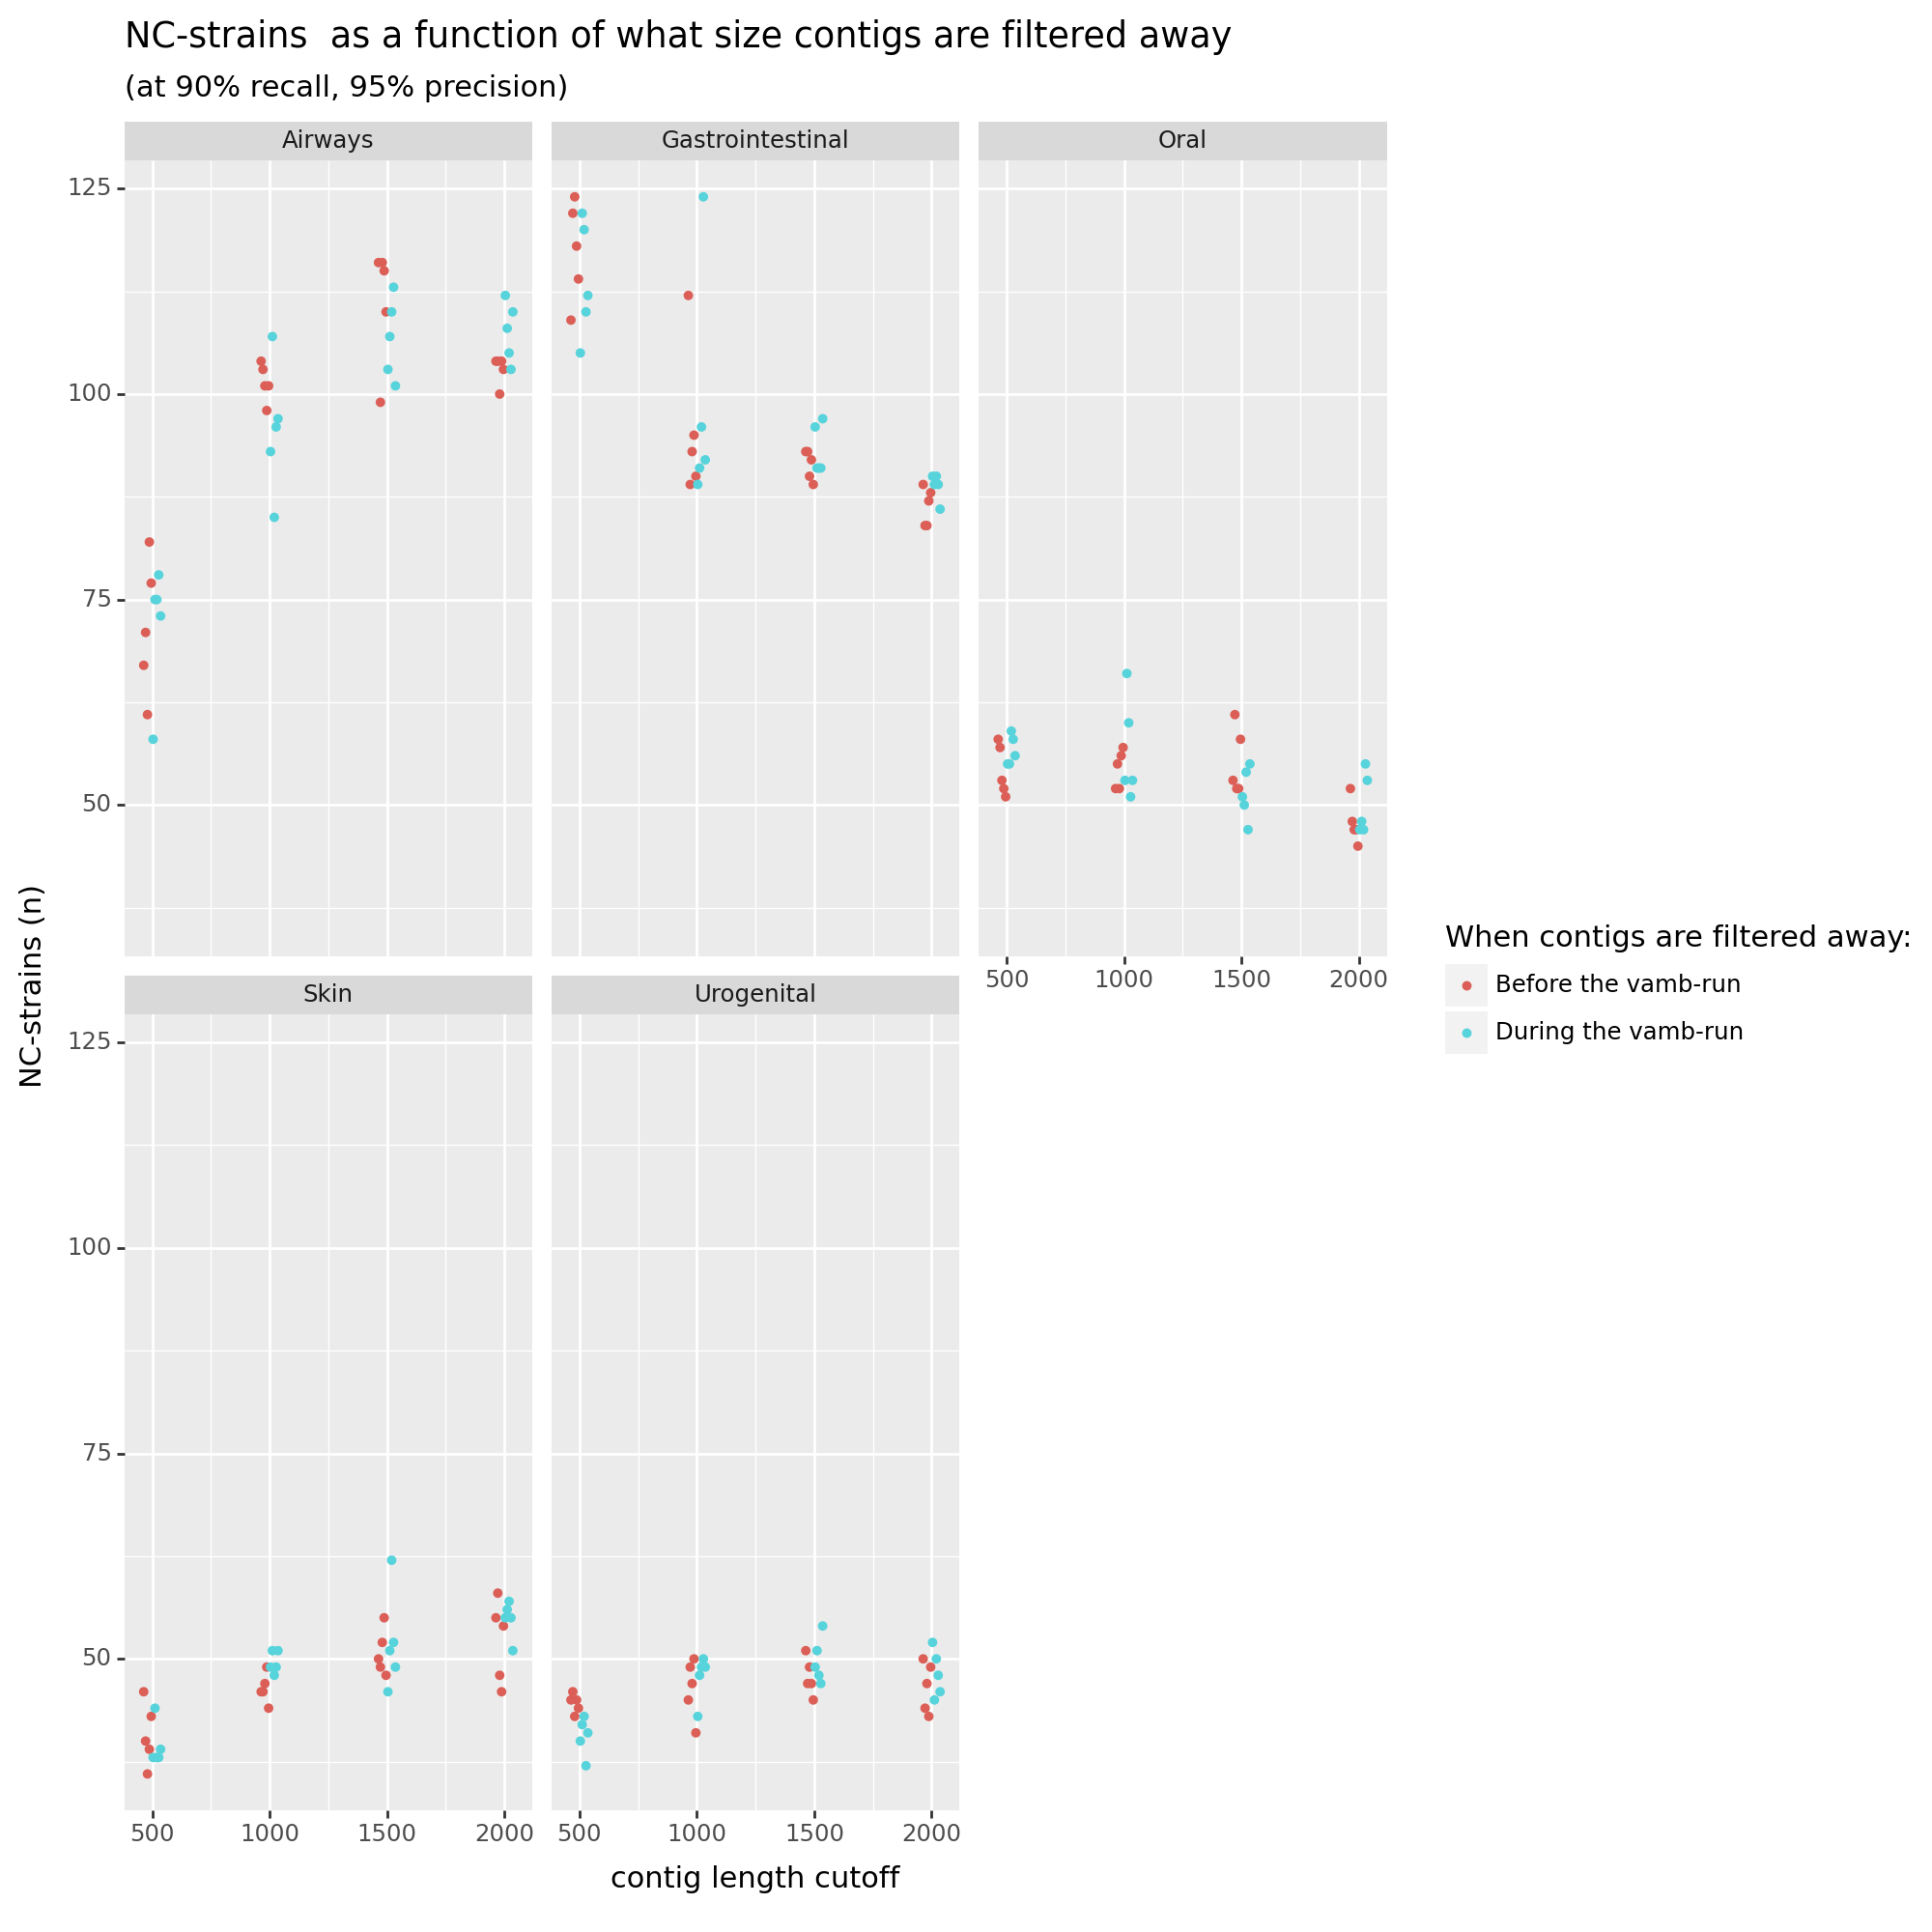

<Figure Size: (1000 x 1000)>

In [228]:
import plotnine
plotnine.options.figure_size = (10,10)
cutoff_all['cutoff'] = 'Before the vamb-run'
cutoff_vamb['cutoff'] = 'During the vamb-run'
df = pd.concat([cutoff_all, cutoff_vamb])
#df["contig_cutoff"] = df["contig_cutoff"].apply(str)

(
    ggplot(df,aes(x = "contig_cutoff", y="nc_strains", color = "cutoff")) +
    geom_point(position = position_dodge2(width = 80), size=1) + 
    facet_wrap("~location") + 
    labs(color = "When contigs are filtered away:", y="NC-strains (n)",x="contig length cutoff", subtitle="(at 90% recall, 95% precision)", title="NC-strains  as a function of what size contigs are filtered away") 
)


In [ ]:
df_grouped = (df
     .groupby(["cutoff", "location", "contig_cutoff"])
     .agg(
         mean_nc_strains = ("nc_strains", "mean"), 
         std_nc_strains = ("nc_strain", "std")
         )
     .reset_index()
)

In [163]:
df_grouped

,cutoff,location,contig_cutoff,mean_nc_strains,std_nc_strains
0,Applying cutoff before vamb,Airways,500,71.6,8.234076
1,Applying cutoff before vamb,Airways,1000,101.4,2.302173
2,Applying cutoff before vamb,Airways,1500,111.2,7.259477
3,Applying cutoff before vamb,Airways,2000,103.0,1.732051
4,Applying cutoff before vamb,Gastrointestinal,500,117.4,6.066300
5,Applying cutoff before vamb,Gastrointestinal,1000,95.8,9.364828
6,Applying cutoff before vamb,Gastrointestinal,1500,91.4,1.816590
7,Applying cutoff before vamb,Gastrointestinal,2000,86.4,2.302173
8,Applying cutoff before vamb,Oral,500,54.2,3.114482
9,Applying cutoff before vamb,Oral,1000,54.4,2.302173


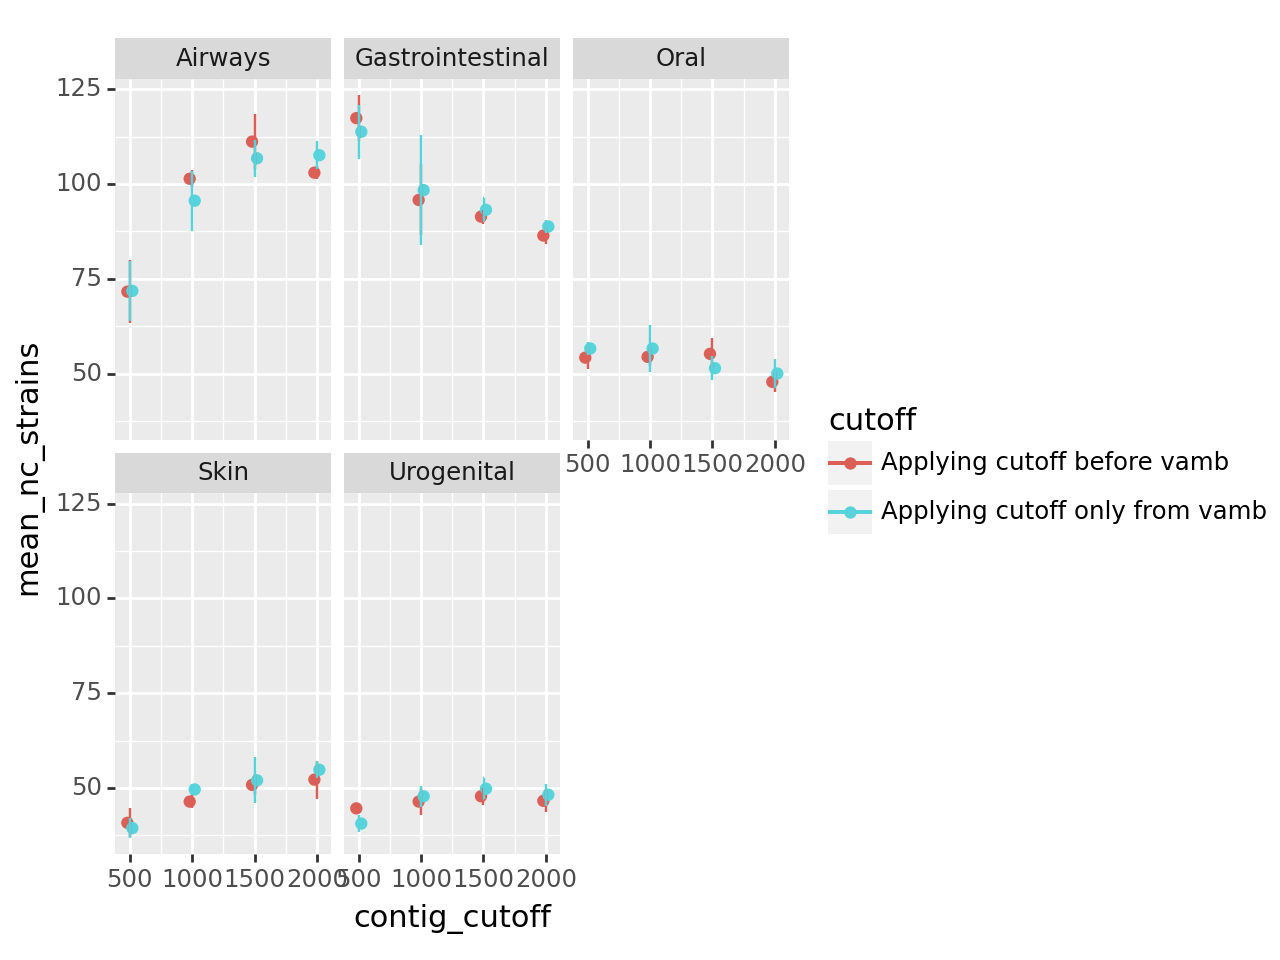

<Figure Size: (640 x 480)>

In [185]:

(
    ggplot(df_grouped,aes(x = "contig_cutoff", y="mean_nc_strains", color = "cutoff")) +
    geom_point(position = position_dodge2(width = 80)) + 
    geom_errorbar(
        aes(x = "contig_cutoff", ymin="mean_nc_strains - std_nc_strains", 
            ymax="mean_nc_strains + std_nc_strains"),
            position = position_dodge2(width = 80)
            ) +
    facet_wrap("~location")
)




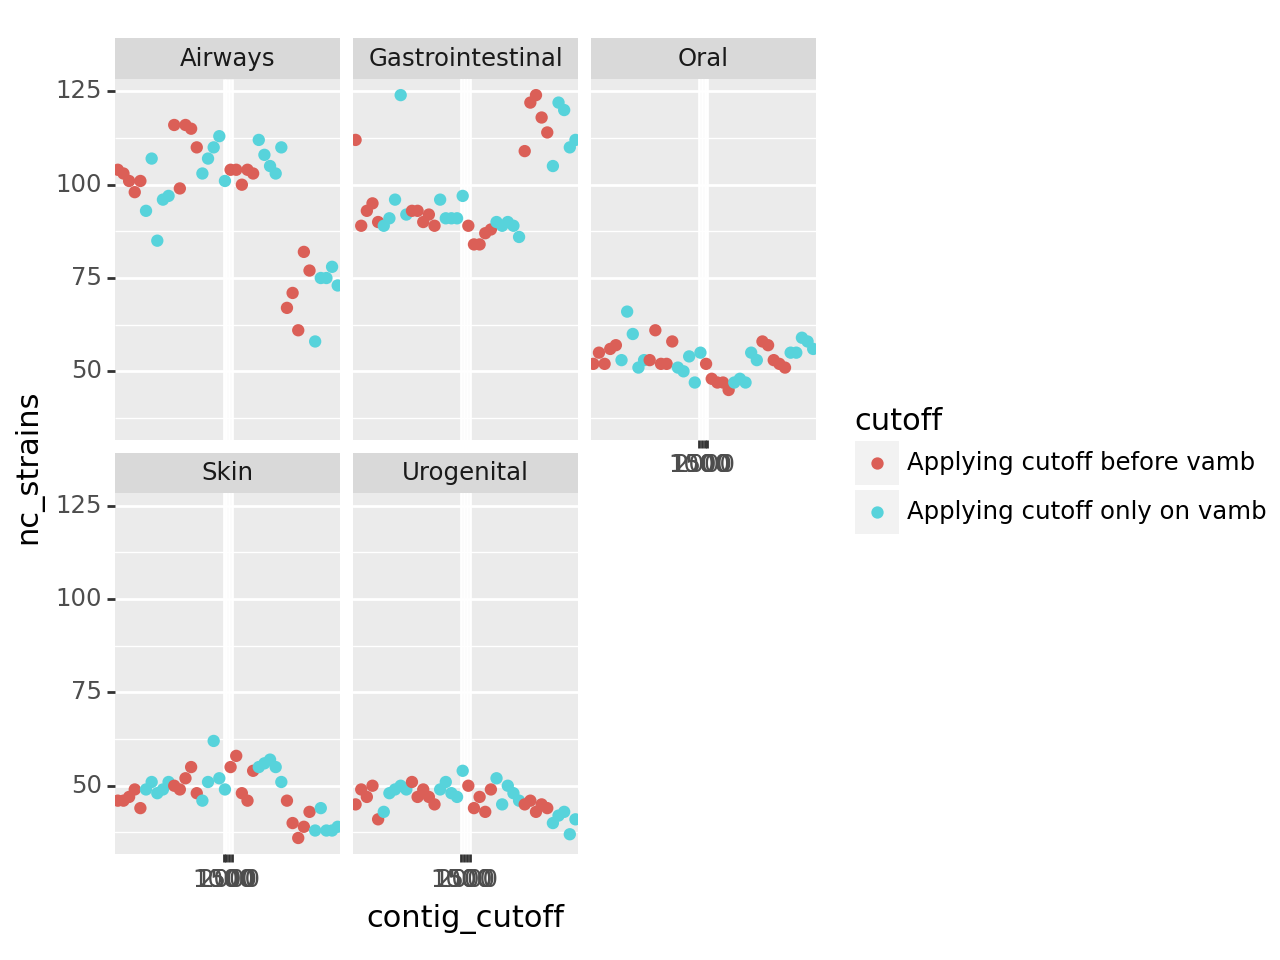

<Figure Size: (640 x 480)>

In [199]:

(
    ggplot(df,aes(x = "contig_cutoff", y="nc_strains", color = "cutoff")) +
    geom_point(position = position_dodge2(width = 80)) + 
    facet_wrap("~location")
)


main (generic function with 1 method)

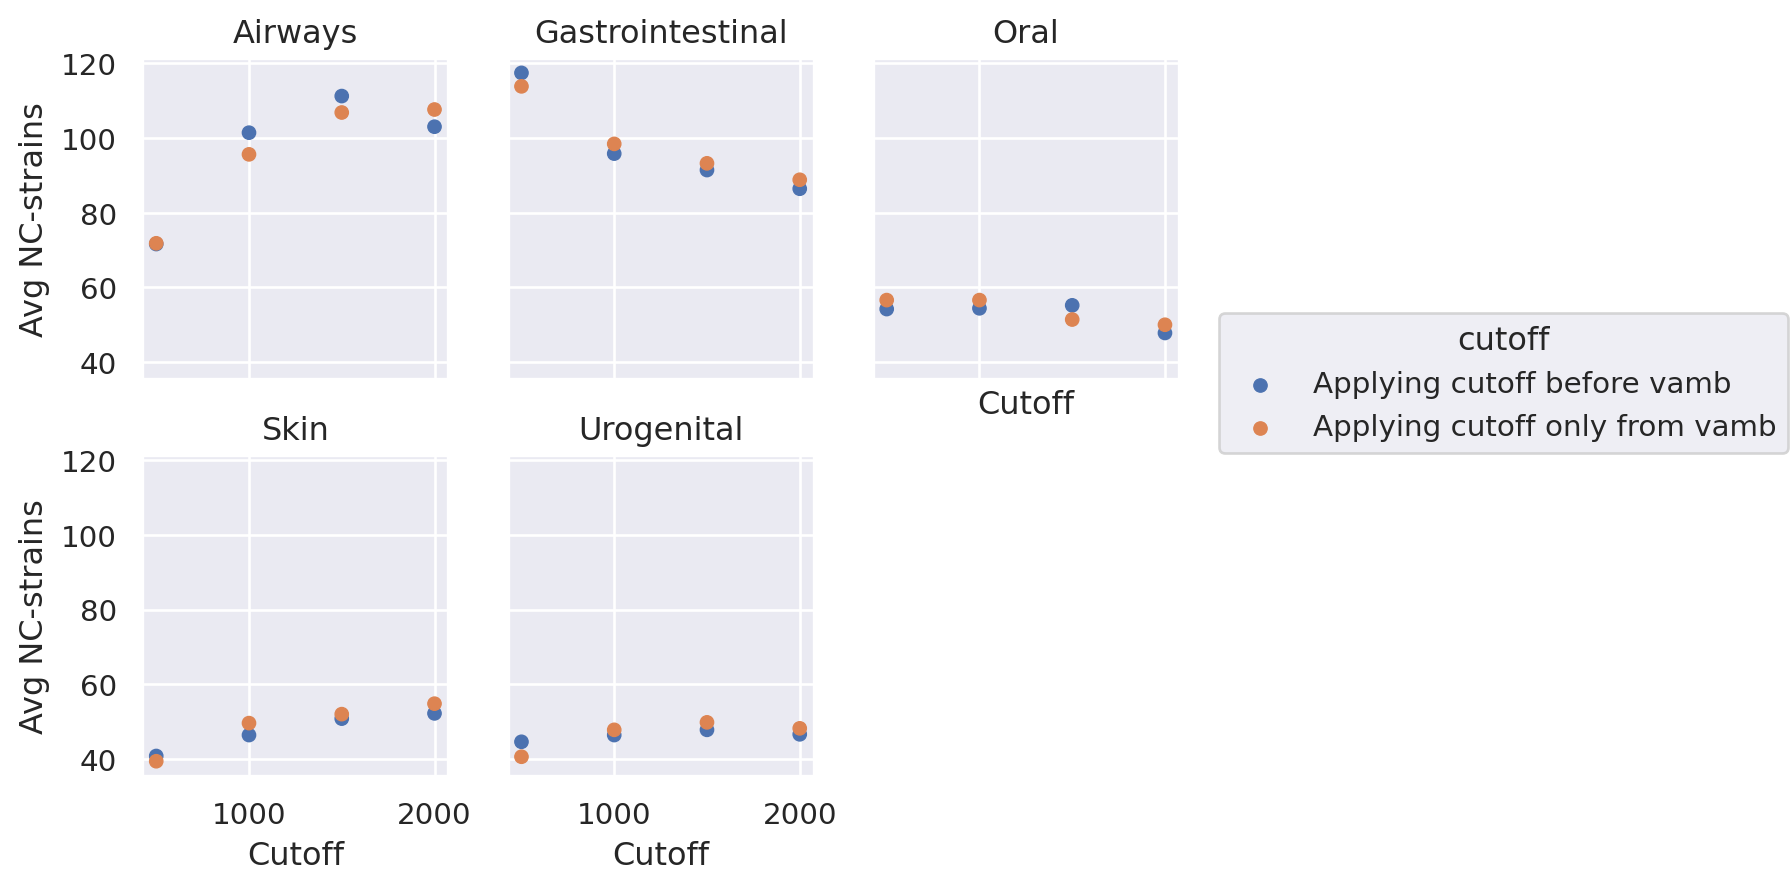

In [119]:
sns.set_theme(style="whitegrid")
(
    so.Plot(df_grouped,x="contig_cutoff", y="mean_nc_strains", color = "cutoff")
    .add(so.Dot(pointsize=5))
    .facet("location", wrap = 3)
    .label(x='Cutoff', y='Avg NC-strains')
    #.add(so.Range(), so.Est(errorbar="se"))
    
)

AttributeError: Line2D.set() got an unexpected keyword argument 'group'

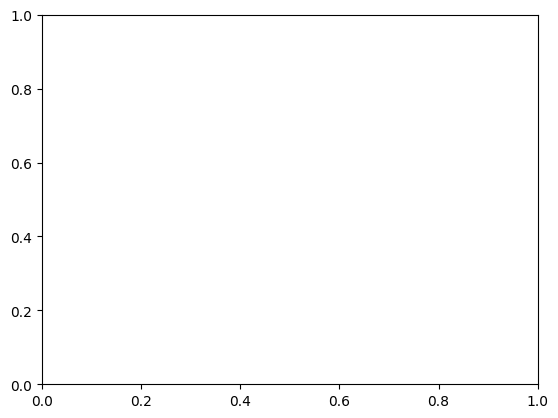

In [58]:

sns.lineplot(df_grouped, x="contig_cutoff", y="mean_nc_strains", group = "cutoff")